    assembling thumbnail 72/72


/home/jmamede/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log


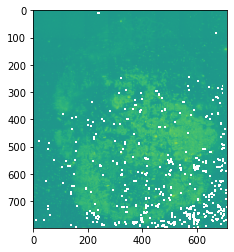

In [23]:
from ashlar import fileseries, thumbnail,reg
import matplotlib.pyplot as plt
from ashlar.scripts.ashlar import process_axis_flip
import numpy as np
import pims

fnames = {}
n_cycles = 3
# fnames[0] = '60CBO_NoninctedSNs_S100S10-AF647_Tuj1-AF555_GFAP-aF488_DAPI_v{series}_PRJ.tif'


fnames[0] = '60CBO_InfecdSNs_S100S10-AF647_Tuj1-AF555_GFAP-aF488_DAPI_v{series}_PRJ.tif'
# fnames[1] = 'C1-60CBO_NoninctedSNs_cGAS-AF647_Iba1-AF555_Ecad-aF488_DAPI_v{series}_PRJ.tif'
fnames[1] = 'C1-60CBO_inctedSNs_cGAS-AF647_Iba1-AF555_Ecad-aF488_DAPI001_v{series}_PRJ.tif'

# fnames[2] = "C2-60CBO_NoinctedSNs_sHLAd-APC_CD69-PE_CD56-AF488_DAPI_v{series}_PRJ.tif"
fnames[2] = "C2-60CBO_inctedSNs_HLAd-APC_CD69-PE_CD56-AF488_DAPI_v{series}_PRJ.tif"
readers = []

#8,9
for i in range(n_cycles):
    readers.append(fileseries.FileSeriesReader(
    #     '/run/media/jmamede/Joao/multiplex/ENDO/img1/',
#         '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/Non-Infected/',
        '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/InfectedSN/',
        pattern=fnames[i],
        overlap=0.15,
        width=8,#7,
        height=9,#6,
        layout='snake',
        direction='horizontal',
        pixel_size=0.10833,
    )
                  )


# check if filenames are indexed properly
# print(
#     '\n'.join(readers[0].metadata.filename(i, 0) for i in range(80, 120))
# )
# it's very likely you'll want `flip_x=False, flip_y=True`
# try not to tweak here for now
# process_axis_flip(c1r, flip_x=False, flip_y=False)


# If using the third channel, pass `channel=2` (0-based indexing in python)
thumbnail_c1r = thumbnail.make_thumbnail(readers[0], channel=3)

plt.figure()
# doing log just for visualization
plt.imshow(np.log(thumbnail_c1r))
# process_axis_flip(c1r, flip_x=False, flip_y=True)

In [42]:
aligner0 = reg.EdgeAligner(readers[0], max_shift=500, channel=3, filter_sigma=0, verbose=True)
aligner0.run()

    assembling thumbnail 72/72
    quantifying alignment error 1000/1000
    aligning edge 127/127


/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


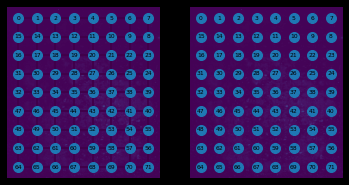

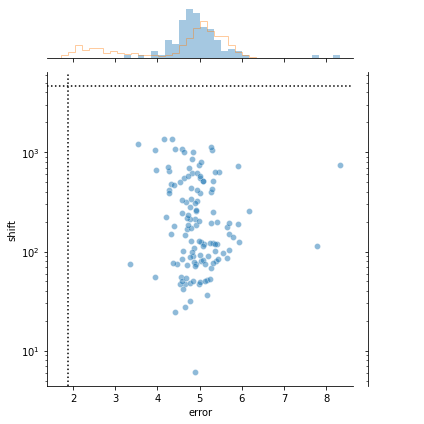

In [43]:
reg.plot_edge_quality(aligner0, img=aligner0.reader.thumbnail)
# plt.gca().suptitle('c1e')

# # plot_edge_scatter function requires seaborn
reg.plot_edge_scatter(aligner0)
# plt.gca().suptitle('c1e')

In [45]:
mosaic_args = {}
#if args.output_channels:
# mosaic_args['channels'] = 4
#pyramid
mosaic_args['tile_size'] = 2048

# if args.quiet is False:
mosaic_args['verbose'] = True
# mosaic_args['flip_mosaic_x'] = False
# mosaic_args['flip_mosaic_y'] = False


In [40]:
aligners = list()
aligners.append(aligner0)
del aligner0

mosaic = reg.Mosaic(
        aligners[0],aligners[0].mosaic_shape,
    '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/InfectedSN/C0-ch{channel}-60CBO_InfectedSNs.ome.tif',**mosaic_args
    )
output = mosaic.run(mode='write')

    Channel 0:
        merging tile 72/72
        writing to /home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/InfectedSN/C0-ch0-60CBO_InfectedSNs.ome.tif
    Channel 1:
        merging tile 72/72
        writing to /home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/InfectedSN/C0-ch1-60CBO_InfectedSNs.ome.tif
    Channel 2:
        merging tile 72/72
        writing to /home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/InfectedSN/C0-ch2-60CBO_InfectedSNs.ome.tif
    Channel 3:
        merging tile 72/72
        writing to /home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/InfectedSN/C0-ch3-60CBO_InfectedSNs.ome.tif


In [41]:
#replace 4 by number of cycles
for j in range(1,n_cycles):
# for j in range(1,1):
    aligners.append(
        reg.LayerAligner(readers[j], aligners[0], max_shift=500, channel=3, filter_sigma=0, verbose=True)
    )
    aligners[j].run()
    mosaic = reg.Mosaic(
        aligners[j], aligners[0].mosaic_shape,
        '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/InfectedSN/C'+str(j)+'-ch{channel}-60CBO_InfectedSNs.ome.tif',**mosaic_args
    )
    mosaic.run(mode='write')

    assembling thumbnail 72/72
    estimated cycle offset [y x] = [4056. 1879.]
    aligning tile 7/72

KeyboardInterrupt: 

In [ ]:
#replace 4 by number of cycles
for j in range(1,n_cycles):
# for j in range(1,1):
    aligners.append(
        reg.LayerAligner(readers[j], aligners[0], max_shift=30, channel=3, filter_sigma=0, verbose=True)
    )
    aligners[j].run()
    mosaic = reg.Mosaic(
        aligners[j], aligners[0].mosaic_shape,
        '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/InfectedSN/C'+str(j)+'-ch{channel}-60CBO_InfectedSNs.ome.tif',**mosaic_args
    )
    mosaic.run(mode='write')


In [35]:
#filepath here:"C.ome.tif" is needed to call Mosaic but mode='return' shouldn't use it.
# mosaic = reg.Mosaic(
#         c1e, c1e.mosaic_shape,'C.ome.tif',**mosaic_args
#     )
# output = mosaic.run(mode='return')
# array = np.array(output)

In [9]:
# ARRAY.shape